In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
import pandas as pd
import copy, math
np.set_printoptions(precision=2)

## Importing Dataset

In [ ]:
dataset = pd.read_csv('/content/CarPrice_Assignment.csv')
dataset['Brand'] = dataset['CarName'].apply(lambda x: x.split(' ')[0])

X = dataset.loc[:, ['enginesize','horsepower','aspiration','drivewheel','carbody','fueltype','doornumber','fuelsystem', 'Brand']].values
y = dataset.iloc[:, -2].values

In [ ]:
X[:,8]

array(['alfa-romero', 'alfa-romero', 'alfa-romero', 'audi', 'audi',
       'audi', 'audi', 'audi', 'audi', 'audi', 'bmw', 'bmw', 'bmw', 'bmw',
       'bmw', 'bmw', 'bmw', 'bmw', 'chevrolet', 'chevrolet', 'chevrolet',
       'dodge', 'dodge', 'dodge', 'dodge', 'dodge', 'dodge', 'dodge',
       'dodge', 'dodge', 'honda', 'honda', 'honda', 'honda', 'honda',
       'honda', 'honda', 'honda', 'honda', 'honda', 'honda', 'honda',
       'honda', 'isuzu', 'isuzu', 'isuzu', 'isuzu', 'jaguar', 'jaguar',
       'jaguar', 'maxda', 'maxda', 'mazda', 'mazda', 'mazda', 'mazda',
       'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda', 'mazda',
       'mazda', 'mazda', 'mazda', 'mazda', 'buick', 'buick', 'buick',
       'buick', 'buick', 'buick', 'buick', 'buick', 'mercury',
       'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi',
       'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi',
       'mitsubishi', 'mitsubishi', 'mitsubishi', 'mitsubishi',
       'mitsubishi', 'Nissan', 'nissan

In [ ]:
brand = []

brand = dataset['Brand'].unique()
brand

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [ ]:
print(X)

[[130 111 'std' ... 'two' 'mpfi' 'alfa-romero']
 [130 111 'std' ... 'two' 'mpfi' 'alfa-romero']
 [152 154 'std' ... 'two' 'mpfi' 'alfa-romero']
 ...
 [173 134 'std' ... 'four' 'mpfi' 'volvo']
 [145 106 'turbo' ... 'four' 'idi' 'volvo']
 [141 114 'turbo' ... 'four' 'mpfi' 'volvo']]


## Encoding Categorical Data

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_features = [2, 3, 4, 5, 6, 7, 8]  # Indices of categorical columns

ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(sparse_output=False), categorical_features)],
    remainder='passthrough'
)

X = np.array(ct.fit_transform(X))

## Splitting into test and training set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(X_train)

[[1.0 0.0 0.0 ... 0.0 122 92]
 [0.0 1.0 0.0 ... 0.0 140 175]
 [0.0 1.0 0.0 ... 0.0 110 73]
 ...
 [1.0 0.0 0.0 ... 0.0 97 69]
 [1.0 0.0 0.0 ... 0.0 171 161]
 [1.0 0.0 0.0 ... 0.0 181 152]]


In [ ]:
# data is stored in numpy array/matrix
print(f"X Shape: {X_train.shape}, X Type:{type(X_train)})")
print(X_train)
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")
print(y_train)

X Shape: (143, 52), X Type:<class 'numpy.ndarray'>)
[[1.0 0.0 0.0 ... 0.0 122 92]
 [0.0 1.0 0.0 ... 0.0 140 175]
 [0.0 1.0 0.0 ... 0.0 110 73]
 ...
 [1.0 0.0 0.0 ... 0.0 97 69]
 [1.0 0.0 0.0 ... 0.0 171 161]
 [1.0 0.0 0.0 ... 0.0 181 152]]
y Shape: (143,), y Type:<class 'numpy.ndarray'>)
[11248.  16503.  10698.   6855.  20970.   7295.  22018.  10345.   6938.
 18150.   7603.   6095.  16695.   9538.  12945.  12764.   6669.   7957.
  7609.  18620.  16845.  18150.  16500.   6189.  11048.   7609.  34028.
  6989.   5118.   7295.  17075.  10595.   6377.  15510.  13845.   6529.
 16925.  18950.   8058.  17710.   8558.  32528.  15985.   7126.  17450.
  5399.  12440.   9495.  16630.   8013.  16430.  10245.   5572.   5348.
 11199.  13495.   7995.   7975.  31600.  22470.  11245.   8916.5  9298.
  8921.  10295.  13200.   8921.   7957.   8778.  11595.   8499.   8845.
 17669.  32250.   7299.   7898.   6785.   7775.  13950.  19699.   6695.
 12170.   8195.   8358.   9980.  36000.   9959.   7129.  18920.

In [ ]:
# Set seed for reproducibility (optional)
np.random.seed(42)

# Initialize w with 52 random values
w_init = np.random.randn(52)  # 52 random values from a standard normal distribution

# Initialize b with a random value (or any constant)
b_init = np.random.randn()  # Random scalar value

# Print shapes and types
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (52,), b_init type: <class 'float'>


## Parameter w and b

In [ ]:
# b_init = 785.1811367994083
# w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (52,), b_init type: <class 'float'>


In [ ]:
print(w_init)

[ 0.5  -0.14  0.65  1.52 -0.23 -0.23  1.58  0.77 -0.47  0.54 -0.46 -0.47
  0.24 -1.91 -1.72 -0.56 -1.01  0.31 -0.91 -1.41  1.47 -0.23  0.07 -1.42
 -0.54  0.11 -1.15  0.38 -0.6  -0.29 -0.6   1.85 -0.01 -1.06  0.82 -1.22
  0.21 -1.96 -1.33  0.2   0.74  0.17 -0.12 -0.3  -1.48 -0.72 -0.46  1.06
  0.34 -1.76  0.32 -0.39]


## Compute cost

In [ ]:
def compute_cost(X, y, w, b):
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar
    return cost

## Compute gradient with multiple variables

In [ ]:
def compute_gradient(X, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w.
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b.
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i, j]
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

In [ ]:
#Compute and display gradient
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -13410.030947308174
dj_dw at initial w,b: 
 [-1.04e+04 -2.99e+03 -3.74e+02 -5.47e+03 -7.56e+03 -6.60e+02 -8.61e+02
 -3.50e+03 -6.85e+03 -1.54e+03 -1.24e+03 -1.22e+04 -7.70e+03 -5.71e+03
 -4.72e+02 -2.24e+03 -9.56e+01 -1.24e+03  0.00e+00 -8.84e+03 -4.49e+02
 -7.73e+01 -3.84e+01 -3.25e+02 -6.43e+02 -9.57e+02 -1.02e+03 -4.60e+01
 -3.15e+02 -6.35e+02 -1.87e+02 -7.26e+02 -7.89e+01 -7.13e+02 -1.16e+02
 -5.02e+02 -6.70e+02 -9.64e+02 -3.46e+02 -2.28e+02 -6.12e+02 -1.34e+02
 -5.56e+02 -3.31e+02 -1.40e+03 -1.10e+02  0.00e+00 -5.47e+02 -1.06e+03
 -1.51e+02 -1.99e+06 -1.67e+06]


## Gradient descent with multiple features

In [ ]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking
    num_iters gradient steps with learning rate alpha

    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent

    Returns:
      w (ndarray (n,)) : Updated values of parameters
      b (scalar)       : Updated value of parameter
      """

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")

    return w, b, J_history #return final w,b and J history for graphing

In [ ]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0
# some gradient descent settings
iterations = 4000
alpha = 5.0e-7
# run gradient descent
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient,
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost 117024833.51   
Iteration  400: Cost 9103138.20   
Iteration  800: Cost 9100232.50   
Iteration 1200: Cost 9097967.35   
Iteration 1600: Cost 9095790.17   
Iteration 2000: Cost 9093689.63   
Iteration 2400: Cost 9091655.89   
Iteration 2800: Cost 9089680.38   
Iteration 3200: Cost 9087755.63   
Iteration 3600: Cost 9085875.14   
b,w found by gradient descent: -1.05,[-1.30e+00  2.54e-01 -8.60e-02 -2.64e+00  1.68e+00  2.00e-01  4.24e-01
 -1.61e+00  1.62e-01 -2.29e-01  3.00e-01 -1.35e+00  8.94e-03 -1.06e+00
 -3.70e-01 -1.88e+00  5.18e-02  3.00e-01  0.00e+00  1.20e+00 -3.31e-01
 -2.14e-02 -6.32e-02 -6.45e-03  2.63e-01  5.19e-01  7.12e-01 -4.25e-02
 -2.78e-01 -3.95e-01 -9.58e-02  2.24e-01 -1.10e-01 -1.45e-01 -2.74e-02
 -4.32e-01 -4.20e-01  1.34e-01 -3.07e-01  1.23e-01  2.47e-01 -1.07e-01
  7.49e-02 -2.92e-01 -7.29e-01 -4.31e-02  0.00e+00 -1.40e-01  3.16e-01
 -3.16e-02  6.76e+01  5.28e+01] 
prediction: 13102.49, target value: 11248.0
prediction: 18710.71, target value: 1

## Plot results

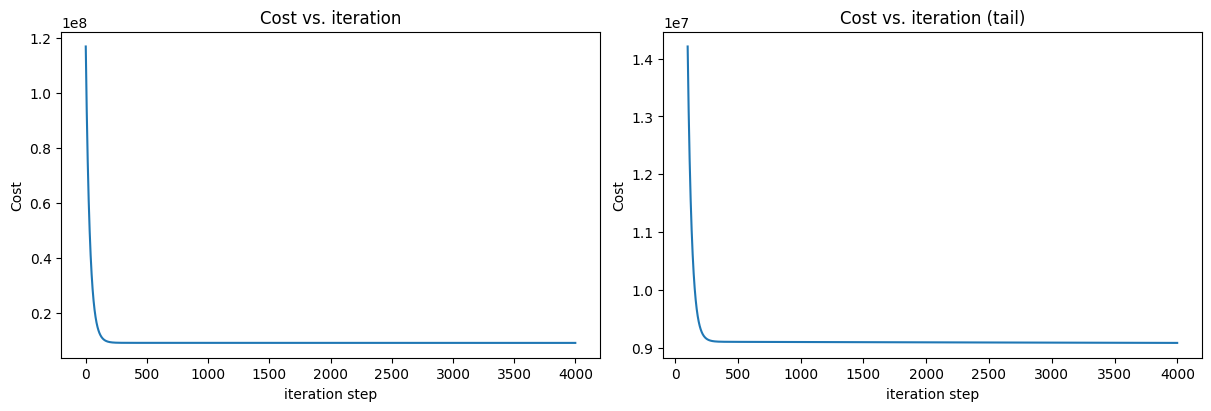

In [ ]:
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step')
plt.show()

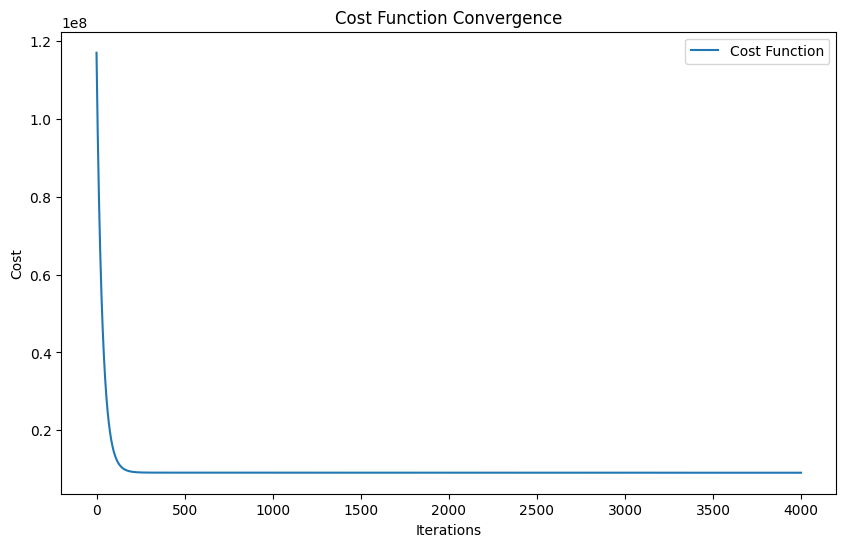

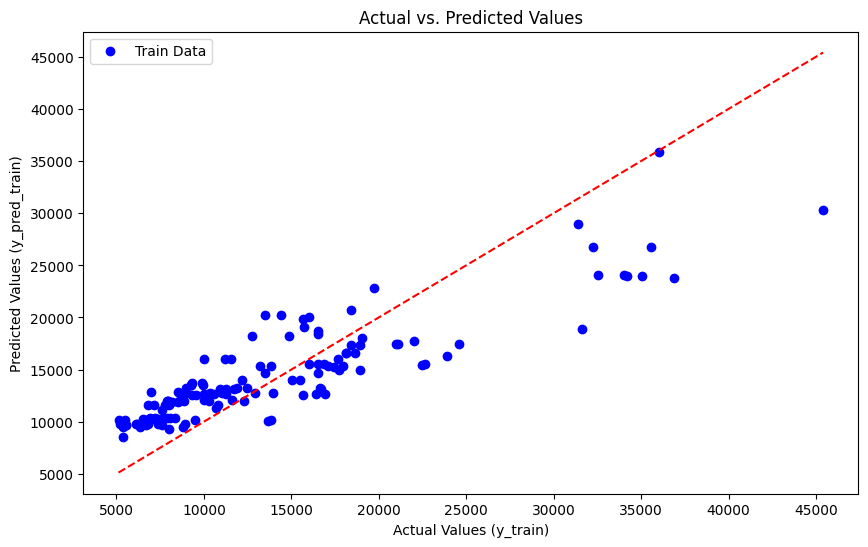

In [ ]:

# Plot the cost function convergence
plt.figure(figsize=(10, 6))
plt.plot(range(len(J_hist)), J_hist, label='Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.legend()
plt.show()

# Plot predictions vs. actual values
y_pred_train = np.dot(X_train, w_final) + b_final

plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, c='blue', marker='o', label='Train Data')
plt.xlabel('Actual Values (y_train)')
plt.ylabel('Predicted Values (y_pred_train)')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')  # Identity line
plt.show()

Test Set Predictions:
Prediction: 23747.19, Actual: 30760.0
Prediction: 17279.37, Actual: 17859.167
Prediction: 13230.91, Actual: 9549.0
Prediction: 13979.33, Actual: 11850.0
Prediction: 18896.46, Actual: 28248.0
Prediction: 10197.05, Actual: 7799.0
Prediction: 10410.01, Actual: 7788.0
Prediction: 10320.89, Actual: 9258.0
Prediction: 12260.58, Actual: 10198.0
Prediction: 9317.37, Actual: 7775.0
Prediction: 15004.85, Actual: 13295.0
Prediction: 10323.04, Actual: 8238.0
Prediction: 15805.91, Actual: 18280.0
Prediction: 13107.27, Actual: 9988.0
Prediction: 30596.59, Actual: 40960.0
Prediction: 9491.68, Actual: 6488.0
Prediction: 6647.73, Actual: 5151.0
Prediction: 18192.11, Actual: 12629.0
Prediction: 12896.89, Actual: 8189.0
Prediction: 12261.05, Actual: 9960.0
Prediction: 12688.29, Actual: 8495.0
Prediction: 20264.72, Actual: 13499.0
Prediction: 10199.94, Actual: 8249.0
Prediction: 9283.84, Actual: 6479.0
Prediction: 9672.01, Actual: 6692.0
Prediction: 23745.72, Actual: 41315.0
Predicti

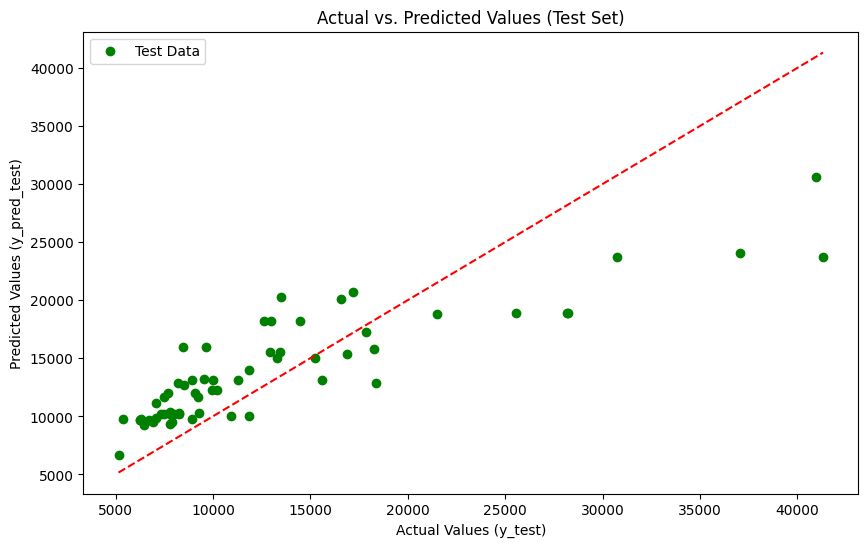

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred_test = np.dot(X_test, w_final) + b_final

# Print predictions vs actual values for test set
print("Test Set Predictions:")
for i in range(len(y_test)):
    print(f"Prediction: {y_pred_test[i]:0.2f}, Actual: {y_test[i]}")

# Evaluate the model performance
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"\nMean Squared Error (Test Set): {mse_test:.2f}")
print(f"R-squared (Test Set): {r2_test:.2f}")

# Plot predicted vs actual values for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, c='green', marker='o', label='Test Data')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred_test)')
plt.title('Actual vs. Predicted Values (Test Set)')
plt.legend()
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Identity line
plt.show()